In [ ]:
'''Data Acquisition and Understanding
Data Preprocessing
Exploratory Data Analysis (EDA)
Feature Engineering (Optional but Recommended)
Model Selection and Training
Model Evaluation and Hyperparameter Tuning
Interpretation and Conclusion
Deployment (Future Consideration)
'''
# Logistic Reg, Decision tree, Random Forest

In [295]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import pandas as pd

In [215]:
df = pd.read_csv("smoking.csv")
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [219]:
df.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [221]:
df.duplicated().sum()

0

In [223]:
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [ ]:
'ID                     0
# gender                 0
'age                    0
'height(cm)             0
'weight(kg)             0
'waist(cm)              0
'eyesight(left)         0
'eyesight(right)        0
'hearing(left)          0
'hearing(right)         0
'systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
'HDL                    0
'LDL                    0
'hemoglobin             0
'Urine protein          0
'serum creatinine       0
'AST                    0
'ALT                    0
'Gtp                    0
# oral                   0
'dental caries          0
# tartar                 0
'smoking                0

In [225]:
df = df.drop('ID',axis=1)

In [227]:
#preprocessing
x=df.drop('smoking',axis=1)
y=df['smoking']

In [229]:
# Identify categorical and numerical columns
cat_feat = x.select_dtypes(include=['object','category']).columns
num_feat = x.select_dtypes(include=['int64','float64']).columns

# checking for Imbalanced data

In [231]:
df['smoking'].value_counts()

smoking
0    35237
1    20455
Name: count, dtype: int64

<Axes: xlabel='smoking', ylabel='count'>

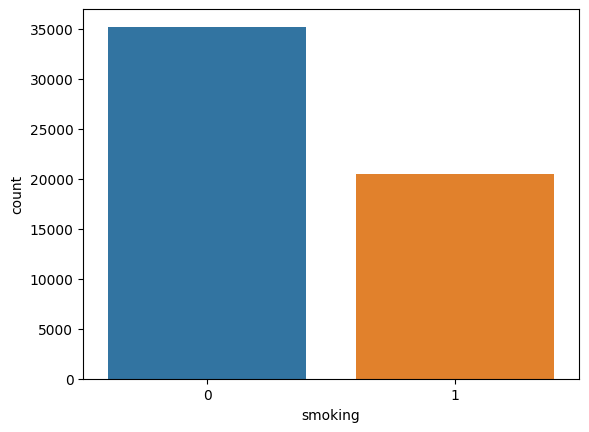

In [297]:
import seaborn as sns
sns.countplot(x='smoking',data=df)

In [151]:
# Preprocessing Pipelines
# For categorical features: One-hot encoding (preferred for nominal categories)
# For 'hearing(left)' and 'hearing(right)', 'Urine protein', 'oral', 'dental caries', 'tartar'
# Use OneHotEncoder to avoid introducing ordinal relationships where none exist.

In [235]:
x['Urine protein'].unique()

array([1., 3., 2., 4., 5., 6.])

In [299]:
# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_feat),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_feat)
    ])

In [301]:
x_processed = preprocessor.fit_transform(x)

In [241]:
# Get feature names for numerical columns
num_features = num_feat.tolist()

In [243]:
# Get feature names for one-hot encoded categorical columns
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_feat).tolist()

In [245]:
# Combine all feature names
all_features = num_features + cat_features

In [247]:
x_processed.shape

(55692, 27)

Text(0, 0.5, 'Count')

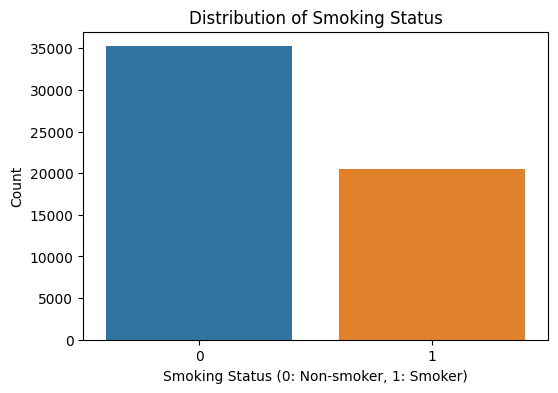

In [303]:
# Class distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='smoking', data=df)
plt.title('Distribution of Smoking Status')
plt.xlabel('Smoking Status (0: Non-smoker, 1: Smoker)')
plt.ylabel('Count')


In [251]:
df['smoking'].value_counts(normalize=True)

smoking
0    0.632712
1    0.367288
Name: proportion, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

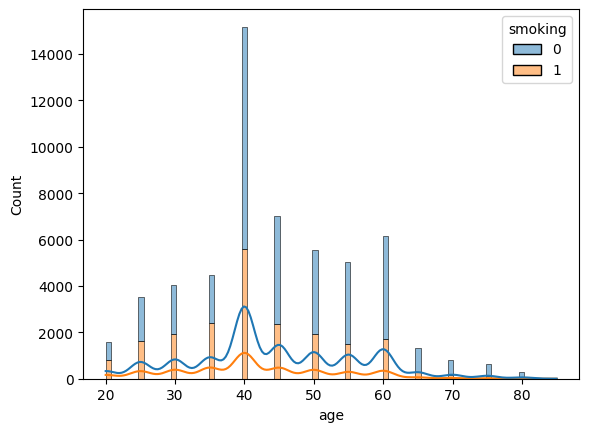

In [305]:
# Distribution of 'age' by 'smoking' status
sns.histplot(data=df, x='age', hue='smoking', kde=True, multiple='stack')

<Axes: xlabel='smoking', ylabel='systolic'>

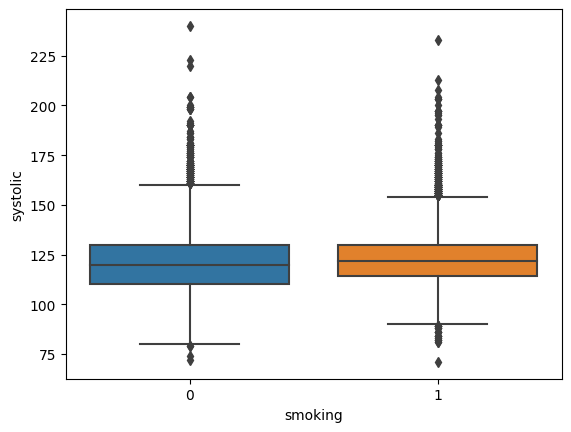

In [307]:
# Box plot for 'systolic' by 'smoking' status
sns.boxplot(x='smoking', y='systolic', data=df)

<Axes: >

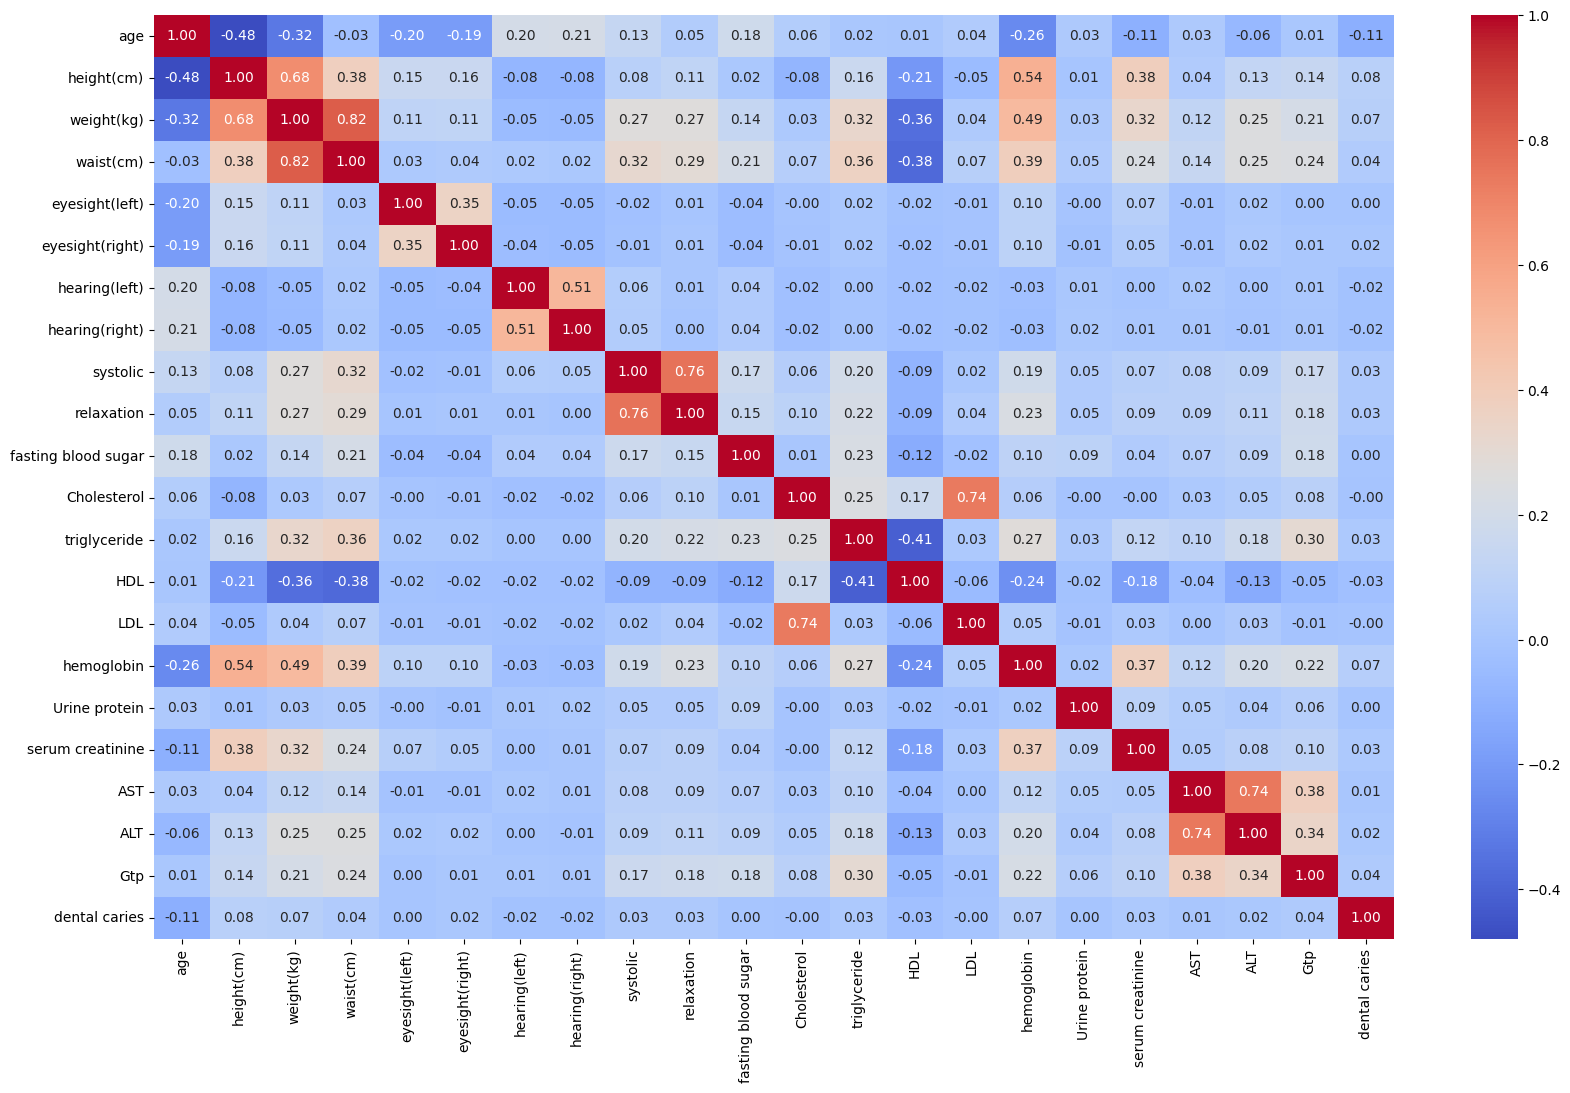

In [265]:
# Correlation Matrix
plt.figure(figsize=(20, 12))
sns.heatmap(df[num_feat].corr(), annot=True, cmap='coolwarm', fmt=".2f")


In [183]:
df['age'].describe()#[['min', '25%', '50%', '75%', 'max']]

count    55692.000000
mean        44.182917
std         12.071418
min         20.000000
25%         40.000000
50%         40.000000
75%         55.000000
max         85.000000
Name: age, dtype: float64

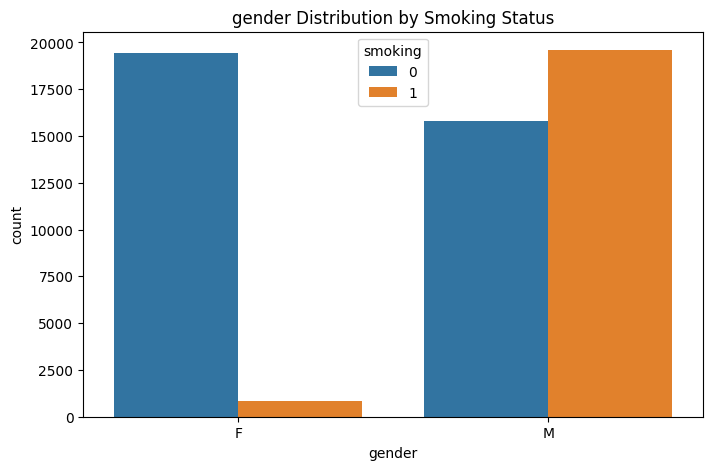

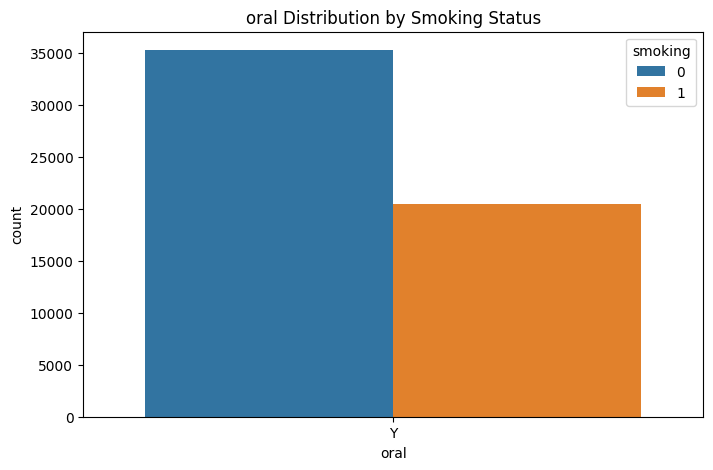

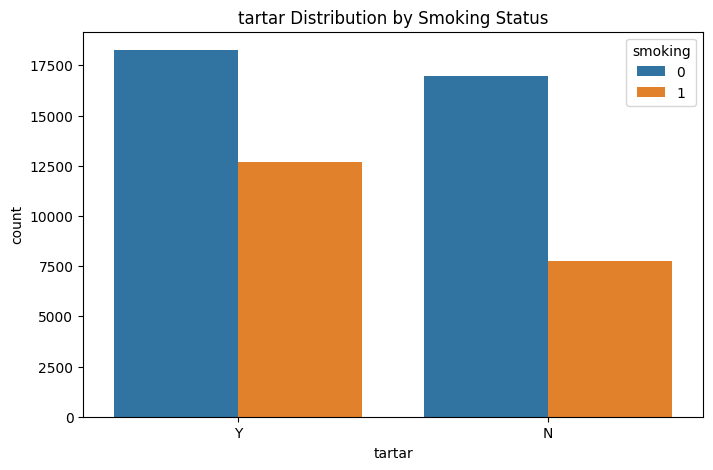

In [309]:
# count plots for categorical features vs. smoking status
for col in cat_feat:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='smoking', data=df)
    plt.title(f'{col} Distribution by Smoking Status')

In [275]:
df['BMI'] = df['weight(kg)'] / ((df['height(cm)'] / 100) ** 2)
df['Pulse_Pressure'] = df['systolic'] - df['relaxation']
df['Cholesterol_Ratio'] = df['Cholesterol'] / df['HDL']


In [279]:

x_train,x_test,y_train,y_test = train_test_split(x_processed,y,test_size=0.2,random_state=42)

In [281]:
x_train.shape

(44553, 27)

In [283]:
x_test.shape

(11139, 27)

In [285]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}


In [311]:
# Train and evaluate initial models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

results = {}

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1] # Probability for the positive class (smoking)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'classification_report': cr
    }


    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\nConfusion Matrix:\n", cm)
    print("\nClassification Report:\n", cr)



--- Training Logistic Regression ---
Accuracy: 0.7411
Precision: 0.6380
Recall: 0.6904
F1-Score: 0.6632
ROC AUC: 0.8259

Confusion Matrix:
 [[5416 1611]
 [1273 2839]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      7027
           1       0.64      0.69      0.66      4112

    accuracy                           0.74     11139
   macro avg       0.72      0.73      0.73     11139
weighted avg       0.75      0.74      0.74     11139


--- Training Decision Tree ---
Accuracy: 0.7809
Precision: 0.7027
Recall: 0.7043
F1-Score: 0.7035
ROC AUC: 0.7650

Confusion Matrix:
 [[5802 1225]
 [1216 2896]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      7027
           1       0.70      0.70      0.70      4112

    accuracy                           0.78     11139
   macro avg       0.76      0.76      0.76     11139
weighted avg       0.

In [313]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
# from sklearn.impute import SimpleImputer

In [315]:
# num_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='median')),
#     ('num', StandardScaler())
# ])

In [317]:

# cat_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='mode')),
#     ('cat', OneHotEncoder(handle_unknown='ignore'))  
# ])

In [319]:
# from sklearn.compose import ColumnTransformer
# preprocessor=ColumnTransformer([
#     ('num',num_pipeline,num_feat),
#     ('cat',cat_pipeline,cat_feat)
# ])

In [321]:
# x_processed = preprocessor.fit_transform(x)

In [209]:
# new_num_feat = num_feat.tolist()

In [323]:
# new_cat_feat = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_feat).tolist()

In [325]:
# all_feat = num_feat+new_cat_feat

In [327]:
# from sklearn.model_selection import train_test_split

In [329]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier

# # 5. Define models
# models = {
#     'Logistic Regression': LogisticRegression(max_iter=1000),
#     'Decision Tree': DecisionTreeClassifier(random_state=42),
#     'Random Forest': RandomForestClassifier(random_state=42)
# }

In [331]:
# from sklearn.metrics import classification_report, confusion_matrix


# # 6. Train and evaluate each model
# for name, model in models.items():
#     clf = Pipeline([
#         ('preprocessor', preprocessor),
#         ('classifier', model)
#     ])
#     clf.fit(x_train, y_train)
#     y_pred = clf.predict(x_test)
#     print(f"\n{name} Results:")
#     print(confusion_matrix(y_test, y_pred))
#     print(classification_report(y_test, y_pred))